In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly as ply
import random
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import warnings
#warnings.filterwarnings("ignore")

197


/home/lau/anaconda2/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



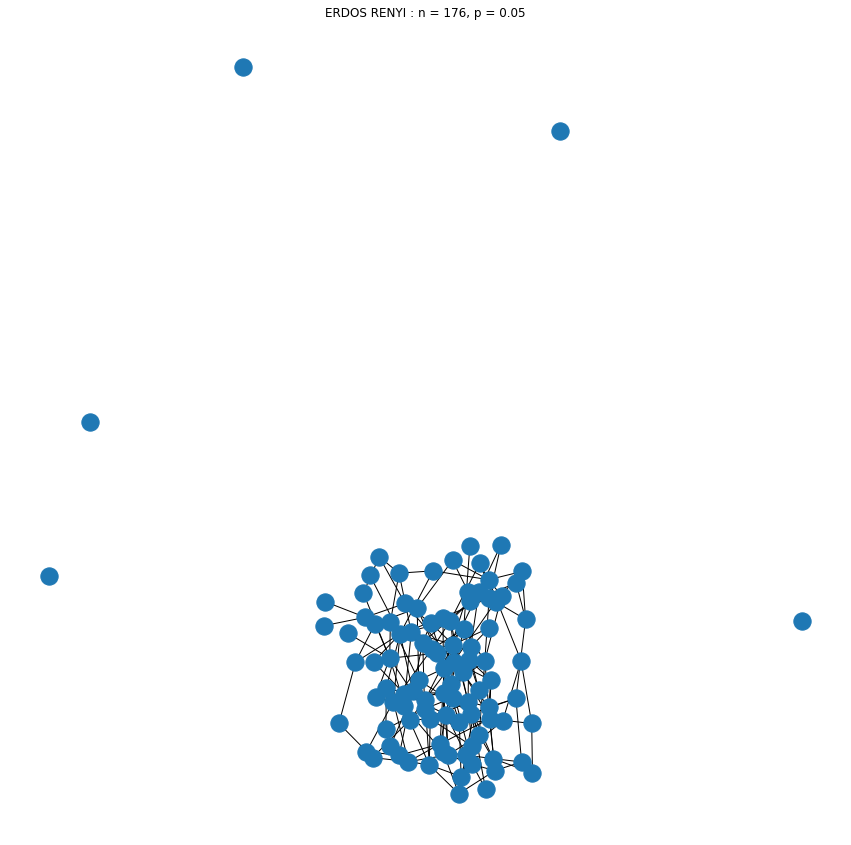

0.027833333333333335


In [2]:
## OPTION unooo, :
## Create random erdos renyi graph with 3 d positions. 
n = 176
# positions = {i: (random.random(), random.random(), random.random()) for i in range(n)}
# , pos = positions DOESNT WORK YET
g = nx.erdos_renyi_graph(100,0.044)
pos = nx.kamada_kawai_layout(g)
print(g.number_of_edges())
plt.figure(figsize=(15,15))
plt.title('ERDOS RENYI : n = 176, p = 0.05')
nx.draw(g)
plt.show()
clustering = nx.average_clustering(g)
print(clustering)

In [3]:
#print(list(g.degree()))
import scipy
x = nx.shortest_path(g)
paths_list = [list(i.values()) for i in x.values()]
path_lengths = []
for i in range(len(paths_list)):
    for j in range(len(paths_list[0])):
        if i != j:
            path_lengths.append(len(path_list[i][j]))

#[item for sublist in l for item in sublist]
# print(len(c))
# print(len(c[0]))
print(len(path_lengths))
print(176**2)

#print(list(x.values()))

NameError: name 'path_list' is not defined

In [ ]:
g1 = nx.watts_strogatz_graph(200,20,0)
g2 = nx.grid_graph([22,22])
print(g1.number_of_edges(),g2.number_of_edges())
print(nx.average_clustering(g1),nx.average_clustering(g2))

In [ ]:
g_type = [nx.erdos_renyi_graph]
g = g_type[0](176,0.05)
g = nx.watts_strogatz_graph(176, 8, 0)
g = nx.soft_random_geometric_graph(176, .13, dim=2, pos=None, p=2, seed=None)
g = nx.powerlaw_cluster_graph(n, m, p, seed=None)


# n (int) – the number of nodes 

# m (int) – the number of random edges to add for each new node

# p (float,) – Probability of adding a triangle after adding a random edge

196


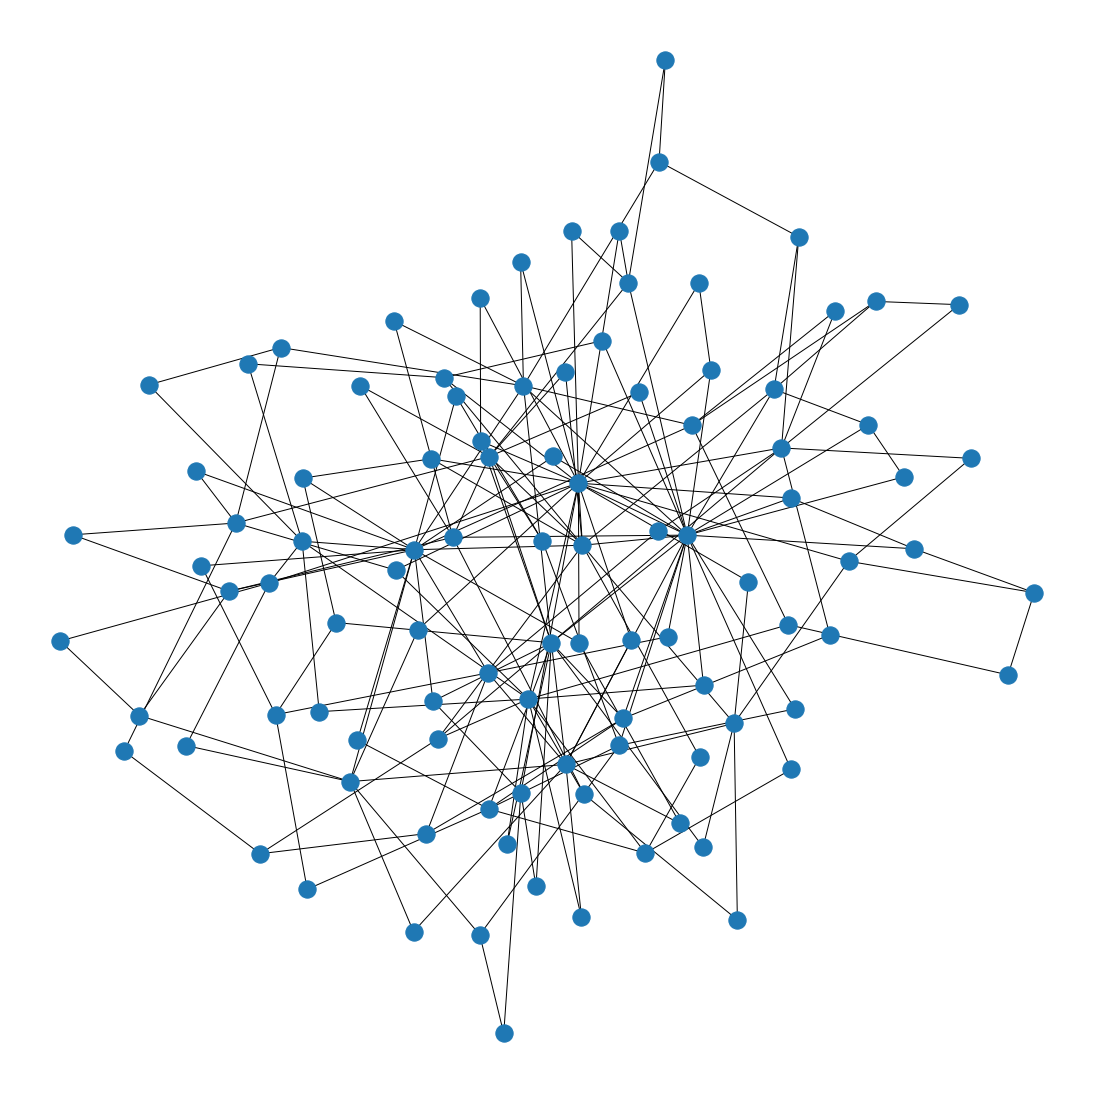

In [4]:
g = nx.powerlaw_cluster_graph(100,2,0)
print(g.number_of_edges())
plt.figure(figsize=(15,15))
nx.draw(g)
plt.show()

0.003123044967651367
704


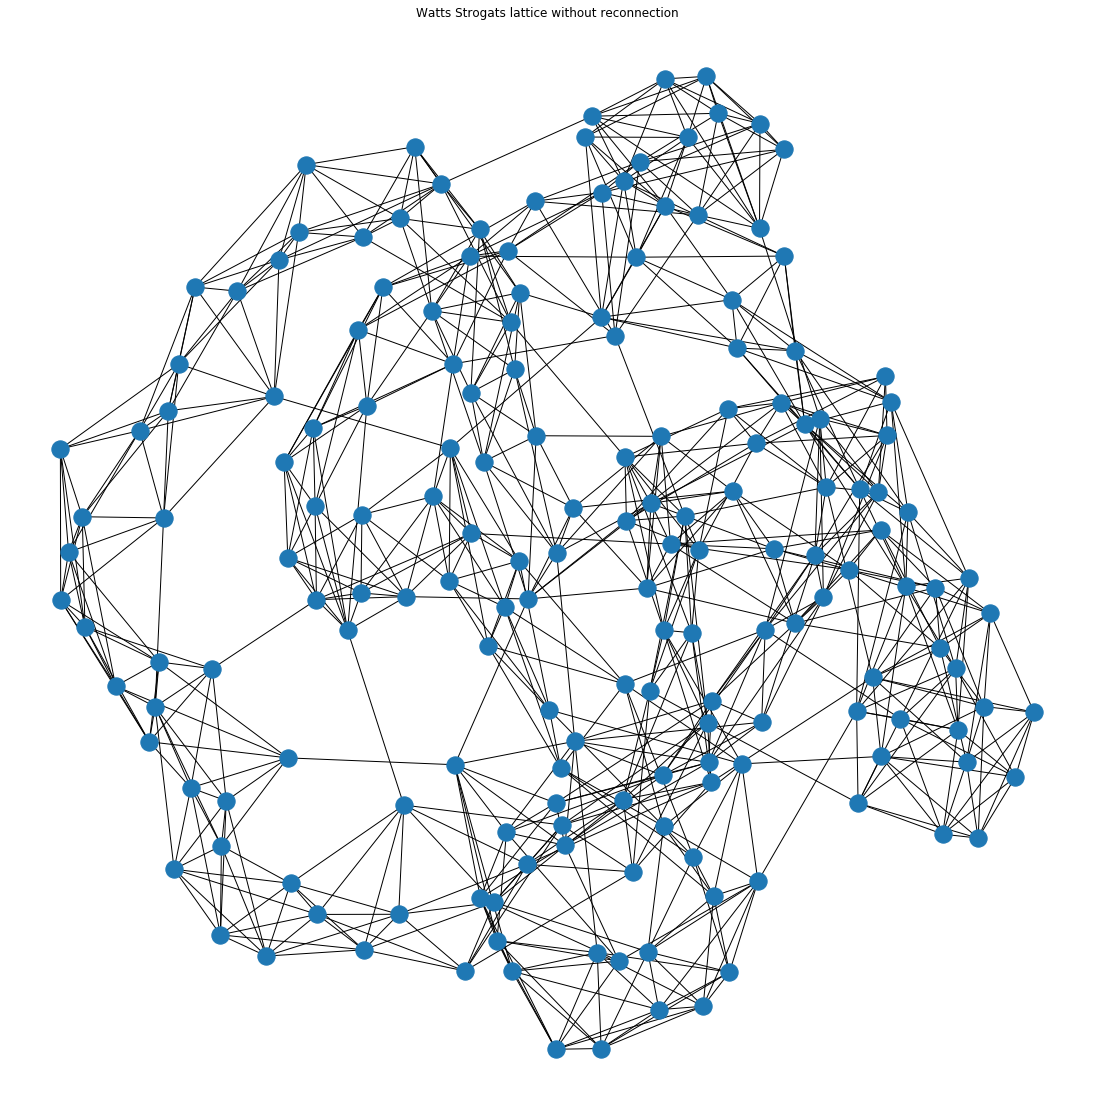

0.5526605339105338


In [5]:
### Latice graph : 
import time
t = time.time()
g = nx.watts_strogatz_graph(176,8, .05)
print(time.time() - t)
print(g.number_of_edges())

pos = nx.kamada_kawai_layout(g)
plt.figure(figsize=(15,15))
nx.draw(g,pos)
plt.title('Watts Strogats lattice without reconnection')
plt.show()
clustering = nx.average_clustering(g)
print(clustering)


19900.0
18516


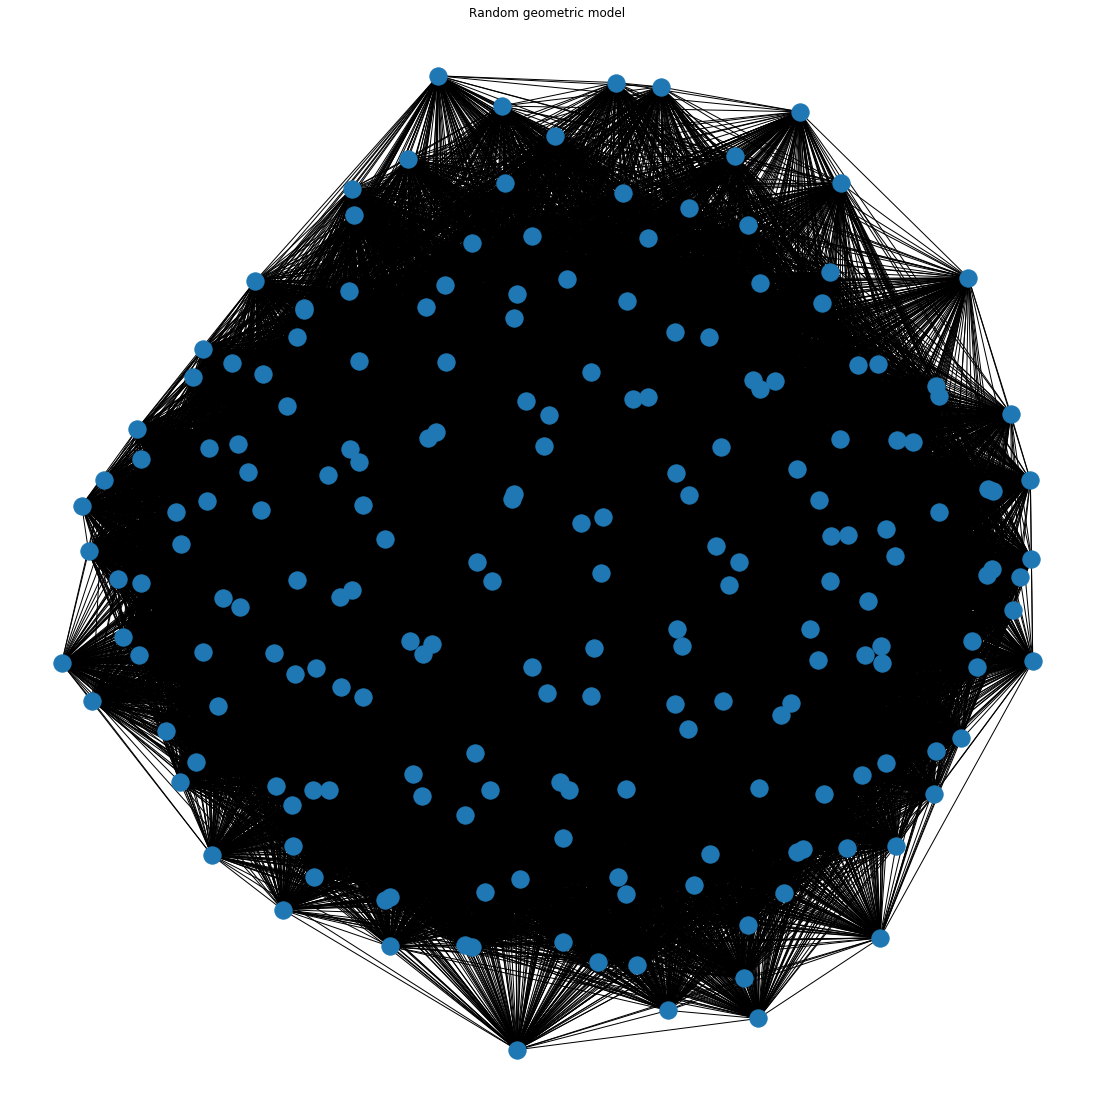

In [18]:
### Geometric graph
N = 200
r_max = 1/(np.sqrt(2) * N)
r = .9
print(N*(N-1)/2)
# print((r**2/r_max**2) * (N-1))
# print(r_max)

# print(N*(N-1)*.5)
# r = 10000/N**2
# print(r)
g = nx.random_geometric_graph(200,r, dim=2, pos=None, p=2, seed=None)
#pos = nx.kamada_kawai_layout(g)
plt.figure(figsize=(15,15))
nx.draw(g)
plt.title('Random geometric model')
print(g.number_of_edges())
plt.show()



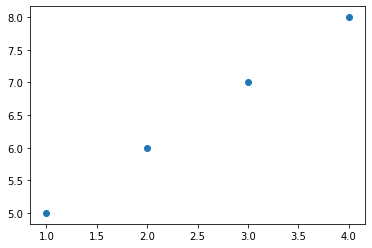

In [9]:
plt.scatter([1,2,3,4],[5,6,7,8])

0.0


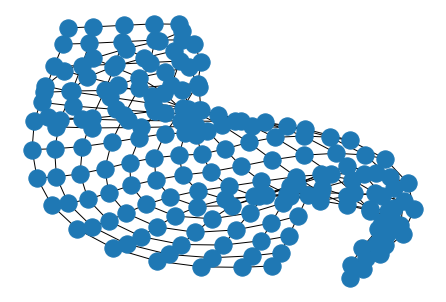

In [72]:
g = nx.grid_2d_graph(14,14)
nx.draw(g)
clustering = nx.average_clustering(g)
print(clustering)
plt.show()

In [ ]:
# Lets make some function to calculate sigma and omega

def get_metrics(g):
    # start with some quick and metrics
    clustering = nx.average_clustering(g)
    shortest_path = nx.average_shortest_path_length(g)
    print('clustering : ',clustering)
    print('shortest path : ',shortest_path)
    # slow metrics for small world ness : 
    sigma = nx.sigma(g,niter = 5)
    omega = nx.omega(g,niter = 5)
    print('small-world metrics: s = ',sigma,'w',omega)
    return [clustering,shortest_path,sigma,omega]
    

In [ ]:
metrics = get_metrics(g)
print(metrics)

In [ ]:
g = nx.erdos_renyi_graph(176,0.04448051948)
metrics = get_metrics(g)

In [ ]:
g = nx.watts_strogatz_graph(176, 8, 0)
metrics = get_metrics(g)

In [ ]:
# create 10 graphs of every type and calculate statistics :

def simulate_10():
    metrics_random = []
    metrics_lattice = []
    metrics_geometric = []
    for i in range(10):
        metrics_random.append(get_metrics(nx.erdos_renyi_graph(176,0.04448051948)))
        metrics_lattice.append(get_metrics(nx.watts_strogatz_graph(176,8,0)))
        metrics_geometric.append(get_metrics(nx.random_geometric_graph(176, .13, dim=2, pos=None, p=2, seed=None)))
        
    return [metrics_random,metrics_lattice,metrics_geometric]

In [ ]:
## USE GEOMETRICH graph for thingies from : http://www.idtools.com.au/3d-network-graphs-python-mplot3d-toolkit/

def generate_random_3Dgraph(n_nodes, radius, seed=None):

    if seed is not None:
        random.seed(seed)
    
    # Generate a dict of positions
    pos = {i: (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)) for i in range(n_nodes)}
    
    # Create random 3D network
    G = nx.random_geometric_graph(n_nodes, radius, pos=pos)

    return G

def network_plot_3D(G, angle, save=False):

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get number of nodes
    n = G.number_of_nodes()

    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])

    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=colors[key], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):

            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)

    plt.show()

In [ ]:
%matplotlib notebook
n=176
G = generate_random_3Dgraph(n_nodes=n, radius=0.25)
network_plot_3D(G,0, save=False)